# Feature Engineering by rows
## Alcoholic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from os import listdir
root="./datasetAlcoholic";


# It is going to take a while to read all the data
linecounter= 0
filecounter=0
df = pd.DataFrame(columns=['user_id', 'alcoholic', 'paradigm','replication','Channel','Min','Max','Sd','Mean',
                               'Median','IQR','0.025','0.25','0.5','0.75','0.975'])
cont=0;
for file in listdir("./datasetAlcoholic"):


        # Renaming the file
        
        filecounter= filecounter + 1
        
        file_root = root + "/" + file
        print(file_root)
        if(file!=".DS_Store"):
            read_file = open(file_root, 'r')
            read_file.readline()
            counterinside=0
            user = []
            alcoholic=[]
            paradigm=[]
            replication=[]
            channel=[]
           
            # For each line we separate the values to add them in the created dataframe
            for line in read_file:
                if(filecounter<=5):
                    linecounter= linecounter + 1
                
                firstline = line.split("  ")
                lineeg=[]

                for i in range(len(firstline)-1):
                    

                    if i==0:
                        user.append(float(firstline[i]))
                    elif i==1:
                        alcoholic.append(firstline[i])

                    elif i==2:

                        paradigm.append(firstline[i])

                    if i==3:

                        replication.append(float(firstline[i]))
                    elif i>=4:
                        if i==4:
                            channelline=firstline[i].split(" ")
                            channel.append(channelline[0])
                            if channelline[1][0]=='c':
                                canal=channelline[1][1:]
                                lineeg.append(float(canal))

                            else:
                                lineeg.append(float(channelline[1]))

                        else:
                            lineeg.append(float(firstline[i]))

              
                datachannel = pd.DataFrame(lineeg)
                min = datachannel.min()
                max = datachannel.max()
                sd = datachannel.std()
                mean = datachannel.mean()
                quantil0=datachannel.quantile(.025)
                quantil1=datachannel.quantile(.25)
                median=datachannel.quantile(.5)
                quantil3=datachannel.quantile(.75)
                quantil4=datachannel.quantile(.975)
                iqr=quantil3[0]-quantil1[0]
                # counterinside is the one which goes through the lines of the current file
                # cont is the counter which goes through all the files
                df.loc[cont]=[user[counterinside],alcoholic[counterinside],paradigm[counterinside],replication[counterinside],channel[counterinside],min[0],max[0],
                              sd[0],mean[0],median[0],iqr,quantil0[0],quantil1[0],median[0],quantil3[0],quantil4[0]]
               
                cont= cont +1
                counterinside= counterinside + 1

## Separate target and features


In [20]:
from sklearn.preprocessing import StandardScaler

features =['Min','Max','Sd','Mean',
                           'Median','IQR','0.025','0.25','0.5','0.75','0.975']
# Separar les variables explicatives
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['alcoholic']].values
print(x)


# Standardizing the features
x = StandardScaler().fit_transform(x)

[[-13.316       19.887        6.70782517 ...   4.751        8.169
   16.958     ]
 [-14.303       24.76         7.97712967 ...   4.74         8.647
   20.854     ]
 [-30.589       31.423        9.71450203 ...   5.788       12.868
   22.939     ]
 ...
 [-44.393        5.412        9.36081215 ... -21.444      -15.096
   -2.095375  ]
 [-14.313        7.172        3.01817636 ...  -3.571       -1.129
    2.289     ]
 [ -9.206        4.466        2.66579825 ...  -2.858       -0.417
    3.001     ]]


## PCA

In [21]:

# Keeping 2 components
pca = PCA(n_components=2)
# Explicative variables transformation
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2'])
principalDf.head(10)

,component 1,component 2
0,-2.127297,1.127029
1,-1.871246,1.785340
2,-1.829238,3.116890
3,-0.420040,2.673921
4,-2.209099,0.114534
5,-2.199313,0.252669
6,-1.988310,-0.694546
7,-1.737862,-0.139550
8,-2.857298,0.420563
9,-1.445223,0.084154


## Important explicative variables

In [22]:

pca.explained_variance_ratio_

array([0.51157998, 0.41333445])

### Relationship important data

In [23]:
df_1 = pd.DataFrame(x, columns=features)

# data normalitzada
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df_1),columns = df_1.columns) 

# PCA
pca = PCA(n_components=3)
pca.fit_transform(data_scaled)

# components relacionats amb les variables explicatives
pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3'])
# The columns we are gonna keep are pc-1: 0.25, pc-2:Sd 

,Min,Max,Sd,Mean,Median,IQR,0.025,0.25,0.5,0.75,0.975
PC-1,-0.333031,-0.072535,0.126015,-0.397220,-0.398721,0.139361,-0.357257,-0.401819,-0.398721,-0.271309,-0.100438
PC-2,-0.234813,0.423992,0.444410,0.154952,0.112623,0.408298,-0.218105,-0.114020,0.112623,0.331751,0.425298
PC-3,0.245066,0.501206,0.101607,-0.014721,-0.255400,-0.384742,0.228598,0.056247,-0.255400,-0.366860,0.457933


## Alcoholic graph

In [24]:
finalDf = pd.concat([principalDf, df[['alcoholic']]], axis = 1)

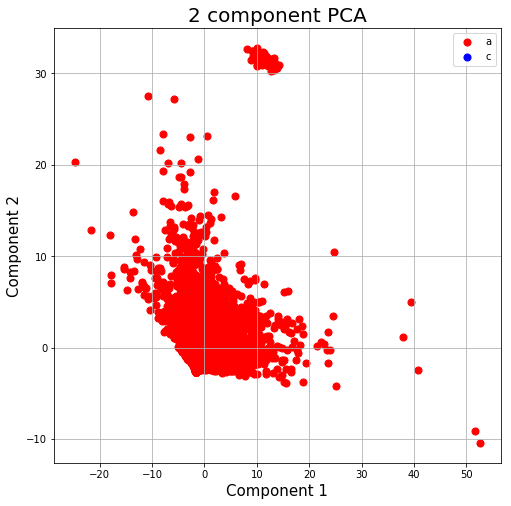

In [25]:

# Visualization of the alcoholic users
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a', 'c']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['alcoholic'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
                ,finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

## Final Data

In [26]:
# It only has to be used once because of the unnecessary columns have been removed and we only take the three explicative variables 
# which are more relevant
resultDf= df.drop(df.columns[[5,6,7,8,9,10,11,12,13,14,15]], axis=1)
resultDf = pd.concat([resultDf, principalDf], axis=1)
resultDf


,user_id,alcoholic,paradigm,replication,Channel,component 1,component 2
0,364.0,a,S1obj,0.0,FP1,-2.127297,1.127029
1,364.0,a,S1obj,0.0,FP2,-1.871246,1.785340
2,364.0,a,S1obj,0.0,F7,-1.829238,3.116890
3,364.0,a,S1obj,0.0,F8,-0.420040,2.673921
4,364.0,a,S1obj,0.0,AF1,-2.209099,0.114534
5,364.0,a,S1obj,0.0,AF2,-2.199313,0.252669
6,364.0,a,S1obj,0.0,FZ,-1.988310,-0.694546
7,364.0,a,S1obj,0.0,F4,-1.737862,-0.139550
8,364.0,a,S1obj,0.0,F3,-2.857298,0.420563
9,364.0,a,S1obj,0.0,FC6,-1.445223,0.084154
